In [2]:
import numpy as np
import pandas as pd
import itertools
import random as rm

cal_prob  is a fucntion that assigned probability from any states to another states base on the following table. 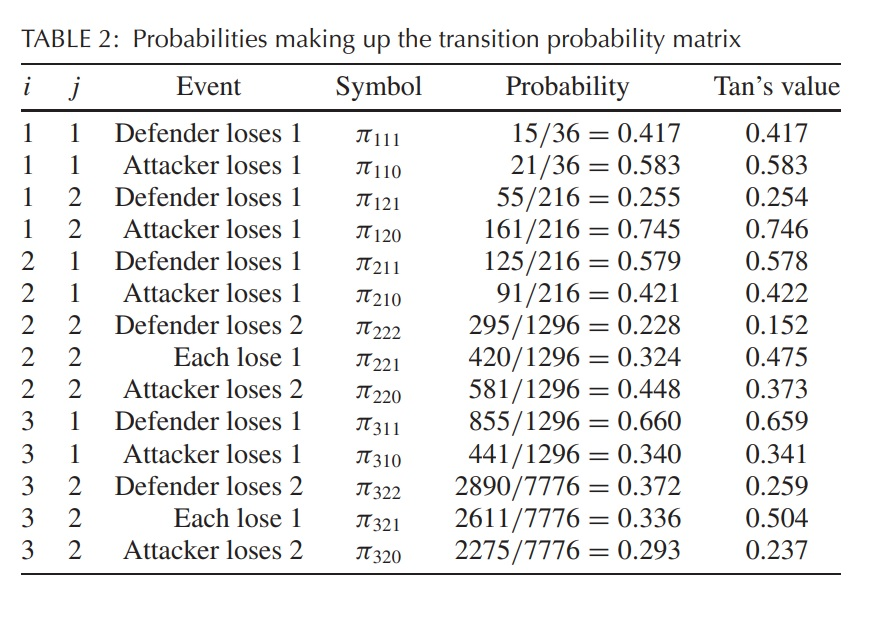

In [3]:
def cal_prob(states1,states2):
  prob = []
  for (a,b) in states1:
   for (c,d) in states2:
     if a>=3 and b>=2:
       if a-c==2 and b-d==0:
        prob.append(0.293)
       elif a-c==0 and b-d ==2:
        prob.append(0.372)
       elif a-c==1 and b-d ==1:
        prob.append(0.336)
       else:
        prob.append(0)
     elif a >= 3 and b==1:
       if a-c==1 and b-d == 0:
        prob.append(0.34)
       elif a-c==0 and b-d ==1:
        prob.append(0.66)
       else:
        prob.append(0)
     elif a== 2 and b >=2:
       if a-c==2 and b-d==0:
        prob.append(0.448)
       elif a-c==0 and b-d ==2:
        prob.append(0.228)
       elif a-c==1 and b-d ==1:
        prob.append(0.324)
       else:
        prob.append(0)
     elif a==2 and b==1:
        if a-c==1 and b-d == 0:
         prob.append(0.421)
        elif a-c==0 and b-d ==1:
         prob.append(0.579)
        else:
         prob.append(0)
     elif a==1 and b>=2:
        if a-c==1 and b-d == 0:
         prob.append(0.745)
        elif a-c==0 and b-d ==1:
         prob.append(0.255)
        else:
         prob.append(0)
     elif a==1 and b==1:
        if a-c==1 and b-d == 0:
         prob.append(0.583)
        elif a-c==0 and b-d ==1:
         prob.append(0.417)
        else:
         prob.append(0)
     else:
       prob.append(0)
 
  return pd.DataFrame(np.reshape(prob, (len(states1),len(states2))), 
                      columns= states2, index = states1)

$A$ = number of attacker

$D$ = number of defender

$X_n$ = $(a,d)$

Absorbing state-> win condition

$X_n = (a_m,0)$ or $(0,d_m)$ where $a_m \geq 1$ and $d_m \geq 1$
 otherwise $X_n$ is transition states


In [4]:
class Cal_ad:
  def __init__(self, a = 0, d = 0):
    self.attacker = a #number of attacker
    self.defender = d #number of defneder
    self.t_states = [] #transitiona states
    self.ab_states = [] #absorbing states
    self.q = [] #matrix Q
    self.r = [] #matrix R
    self.F = [] #matrix F = (I-Q)^-1 *R
    self.i = [] #Identity matrix
    self.p = 0 #probaility that the attacker wins
    self.l = [] #number of lossing attacker and defender form each states 
    #to absorbing states
    self.EdefL = 0 #Expected number of lossing defenders
    self.EatkL = 0 #Expected number of lossinf attackers

  def get_data(self):
    print('Test("%s","%s","%s")' % (self.q, self.r, self.F ))

  def cal_states(self): #create list of transition states and absorbing states.
    def_arr = np.arange(self.defender+1)
    atk_arr = np.arange(self.attacker+1)
    states_arr = list(itertools.product(atk_arr, def_arr))
    for (a,b) in states_arr:
      if a == 0 and b >=1:
        self.ab_states.append((a, b))
      elif a>=1 and b == 0:
        self.ab_states.append((a, b))
      elif a >= 1 and b>=1:
        self.t_states.append((a, b))
  
  def cal_mx(self): #Create matrix Q, R, I and F
    self.q = cal_prob(self.t_states, self.t_states)
    self.r = cal_prob(self.t_states, self.ab_states)
    self.i = np.eye(len(self.t_states))
    self.F = pd.DataFrame(np.matmul(np.linalg.inv(self.i-self.q.values), self.r ),
                          columns = self.ab_states, index=self.t_states)
  def cal_p(self): #Calculate proability that the attakcer wins
    self.p = sum(self.F.iloc[self.attacker*self.defender-1]
                [len(self.F.iloc[self.attacker*self.defender-1])-self.attacker:])
    
  def losses(self): 
    for (x,y) in self.ab_states:
      self.l.append((self.attacker-x, self.defender-y))
    
  def e_def_loss(self): #Calculate the expected of lossing defender.
      d_l = []
      for (x,y) in self.l:
        d_l.append(y)
      pb = list(self.F.iloc[self.attacker*self.defender-1])
      self.EdefL = np.dot(d_l,pb)
    
  def e_atk_loss(self): #Calculate the expected fo lossing attacker
    d_l = []
    for (x,y) in self.l:
       d_l.append(x)
    pb = list(self.F.iloc[self.attacker*self.defender-1])
    self.EatkL = np.dot(d_l,pb)

In [5]:
x = Cal_ad(5,5)
x.cal_states()
x.cal_mx()
x.losses()
x.e_def_loss()
x.e_atk_loss()
x.cal_p()

In [6]:
x.get_data()


Test("        (1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (2, 1)  (2, 2)  (2, 3)  \
(1, 1)   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
(1, 2)   0.255   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
(1, 3)   0.000   0.255   0.000   0.000   0.000   0.000   0.000   0.000   
(1, 4)   0.000   0.000   0.255   0.000   0.000   0.000   0.000   0.000   
(1, 5)   0.000   0.000   0.000   0.255   0.000   0.000   0.000   0.000   
(2, 1)   0.421   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
(2, 2)   0.324   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
(2, 3)   0.000   0.324   0.000   0.000   0.000   0.228   0.000   0.000   
(2, 4)   0.000   0.000   0.324   0.000   0.000   0.000   0.228   0.000   
(2, 5)   0.000   0.000   0.000   0.324   0.000   0.000   0.000   0.228   
(3, 1)   0.000   0.000   0.000   0.000   0.000   0.340   0.000   0.000   
(3, 2)   0.000   0.293   0.000   0.000   0.000   0.336   0.000   0.000   
(3, 3)   0.000   0.000   0.293  